#BASIC INFORMATION (ReadMe)



**1.  About Jupyter Notebook and Google Colab**
- Jupyter Notebook is an open-source web application that allows you to create and share documents that contain live code, equations, visualizations and text. Uses include: data cleaning and transformation, numerical simulation, statistical modeling, data visualization, machine learning etc.
- Google Colaboratory is a free Jupyter notebook environment that requires no setup and runs entirely in the cloud. 

**2.   About this lab**

- In this lab we will explore and use Melbourne housepricing dataset.  Each row in the dataset is a housing sale and columns are the features of the sold house/appartment.


- The goal is to predict the price of new sales. We will build two supervised models: regression models and artificial neural network. ML pipeline outlined in the theory part of the course will be followed. 


**3.  How to save own version of the Jupyter notebook**

- Go to File and choose "Save a copy in Drive". This will save your code notebook on your Google Drive.

**4.   How to run/execute cell of code**

- Alt1: Ctrl+Shift tab through the code.
- Alt2:  Mark the cell,  press "Run" button on the left side of the cell.


**5.  More info about dataset**
 - Data source: https://www.kaggle.com/anthonypino/melbourne-housing-market


 - Columns/fields in the dataset:
1. Suburb: Suburb
2. Address: Address
3. Rooms: Number of rooms
4. Price: Price in Australian dollars, AUD
5. Method: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.
6. Type: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.
7. SellerG: Real Estate Agent
8. Date: Date sold
9. Distance: Distance from CBD in Kilometres 
10. Regionname: General Region (West, North West, North, North east ...etc)
11. Propertycount: Number of properties that exist in the suburb
12. Bedroom2 : Scraped # of Bedrooms (from different source)
13. Bathroom: Number of Bathrooms
14. Car: Number of carspots
15. Landsize: Land Size in Metres
16. BuildingArea: Building Size in Metres
17. YearBuilt: Year the house was built
18. CouncilArea: Governing council for the area
19. Lattitude: Self explanitory
20. Longtitude: Self explanitory


#1) CLONE ENVIRONMENT & IMPORT LIBRARIES

##1.1. Get all the files
- Run the below code cell if the notebook is opened in Google Collab. It will clone the github repository to get all necessary files.

In [0]:
!git clone https://github.com/NordAxon/AI-For-Leaders.git

Cloning into 'AI-For-Leaders'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 229 (delta 5), reused 0 (delta 0), pack-reused 213
Receiving objects: 100% (229/229), 53.46 MiB | 21.96 MiB/s, done.
Resolving deltas: 100% (106/106), done.
Checking out files: 100% (28/28), done.


## 1.2 Import libraries
- ML with Python offers a great deal of libraries.
- Read about some of the most used: https://hackernoon.com/top-10-libraries-in-python-to-implement-machine-learning-12602cf5dc61

- Lets import all the libraries we need to run the code and perform the analysis. Run the below code cell.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

import seaborn as sns

pd.set_option('display.max_columns', 100)
%load_ext autoreload
%autoreload 2

np.random.seed(1)

Using TensorFlow backend.


# 2) IMPORT RAW DATA

In [0]:
#housing_df_original = pd.read_csv('AI-For-Leaders/data/melbourne-housing-market/Melbourne_housing.csv')
housing_df_original = pd.read_csv('AI-For-Leaders/data/melbourne-housing-market/Melbourne_housing_shuffled.csv')
housing_df_original

,index,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,2555,Ivanhoe,6/74 Marshall St,2,u,NaN,SN,Miles,17/09/2016,7.9,3079.0,2.0,1.0,1.0,0.0,17.0,1960.0,Banyule City Council,-37.77110,145.04700,Eastern Metropolitan,5549.0
1,12645,Dandenong North,13 Finsbury Ct,3,h,690000.0,S,Harcourts,3/03/2018,24.7,3175.0,3.0,2.0,2.0,540.0,121.0,1975.0,Greater Dandenong City Council,-37.94455,145.20036,South-Eastern Metropolitan,8322.0
2,6371,Burwood,5/19 Hughes St,4,t,845000.0,PI,hockingstuart,3/06/2017,10.4,3125.0,4.0,3.0,2.0,94.0,184.0,NaN,Monash City Council,-37.85213,145.10928,Southern Metropolitan,5678.0
3,4746,Williamstown,200 Osborne St,5,h,NaN,SP,Greg,16/07/2016,8.0,3016.0,5.0,2.0,3.0,1019.0,278.0,1915.0,Hobsons Bay City Council,-37.86420,144.89150,Western Metropolitan,6380.0
4,12455,Bentleigh East,360 McKinnon Rd,3,h,1200000.0,VB,Buxton,10/02/2018,13.8,3165.0,3.0,2.0,1.0,NaN,126.0,1940.0,Glen Eira City Council,-37.91328,145.05445,Southern Metropolitan,10969.0
5,4327,St Kilda,26/11 Marine Pde,1,u,354000.0,S,McGrath,30/07/2016,6.1,3182.0,1.0,1.0,1.0,1659.0,46.0,1960.0,Port Phillip City Council,-37.86990,144.97640,Southern Metropolitan,13240.0
6,5675,Glenroy,1/26 York St,3,t,595000.0,SP,Nelson,20/05/2017,13.0,3046.0,3.0,1.0,2.0,258.0,142.6,2001.0,Moreland City Council,-37.70470,144.90870,Northern Metropolitan,8870.0
7,8291,Lalor,2/7 Cooma Ct,2,u,444000.0,S,HAR,29/07/2017,16.3,3075.0,2.0,1.0,1.0,277.0,100.0,1980.0,Whittlesea City Council,-37.66612,145.00080,Northern Metropolitan,8279.0
8,13370,Templestowe,19 Jacobena Pl,4,h,1370000.0,VB,Fletchers,17/03/2018,15.5,3106.0,4.0,2.0,2.0,781.0,269.0,1980.0,Manningham City Council,-37.75726,145.14123,Eastern Metropolitan,6202.0
9,4831,Yarraville,109 Powell St,3,h,1320000.0,S,Jas,4/03/2017,7.0,3013.0,3.0,2.0,2.0,473.0,171.0,1920.0,Maribyrnong City Council,-37.82170,144.88420,Western Metropolitan,6543.0


In [0]:
# Size of the dataset (X, Y)
print ('Nr of lines and Nr of columns: ' + str(housing_df_original.shape))

Nr of lines and Nr of columns: (13742, 22)


# 3) EXPLORE DATA & PRE-PROCESSING

##  3.1. Fill in empty/missing data

- In some of the columns we have NaN(Not a Number) values i.e. missing data.

- Many ML algorithms need data in all rows and columns so the NaNs have to be filled with something meaningful. E.g. "Landsize" will be filled with 0 to indicate that there is no land contained in the real estate sale. 



 


Let's first have a look at how many NaN values are present in each column. 
- Run the code cell below

In [0]:
print('Number of NaNs for every variable:')
print(pd.isnull(housing_df_original).sum())

Number of NaNs for every variable:
index               0
Suburb              0
Address             0
Rooms               0
Type                0
Price            3086
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car               232
Landsize         1602
BuildingArea        0
YearBuilt         504
CouncilArea         0
Lattitude           9
Longtitude          9
Regionname          0
Propertycount       0
dtype: int64


- Lets clean and fill/replace missing/odd values <br>

>1.   Remove rows where there is no price
>2.   Fill NaN values in columns BuildingArea, Rooms, Landsize, Car, Bathroom, Bedroom2 with 0
>3.   For column YearBuilt, fill with the mean value of that column since the house being built at year 0 seems unlikely




In [0]:
housing_df_no_nan = housing_df_original.copy()

# Remove all rows with no price data
housing_df_no_nan = housing_df_no_nan[pd.notnull(housing_df_no_nan['Price'])]

# Replace NaN values with 0 values in columns BuildingArea, Rooms, Landsize, Car, Bathroom, Bedroom2 
housing_df_no_nan['BuildingArea'].fillna(0.0, inplace=True)
housing_df_no_nan['Rooms'].fillna(0.0, inplace=True)
housing_df_no_nan['Landsize'].fillna(0.0, inplace=True)
housing_df_no_nan['Car'].fillna(0.0, inplace=True)
housing_df_no_nan['Bathroom'].fillna(0.0, inplace=True)
housing_df_no_nan['Bedroom2'].fillna(0.0, inplace=True)

# Replace NaN values in YearBuilt column with mean value of that column
housing_df_no_nan['YearBuilt'].fillna(housing_df_no_nan['YearBuilt'].mean(), inplace=True)

print('Number of NaNs for every variable:')
print(pd.isnull(housing_df_no_nan).sum())

Number of NaNs for every variable:
index            0
Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        9
Longtitude       9
Regionname       0
Propertycount    0
dtype: int64


##**3.2. Plot variable correlations and histograms**

- Let's have a look at how different variables relate to each other and how the data is distributed. 
- The goal is to get insight in our dataset, understand how different columns relate to each other and look for outliers.
- Let pick some columns(variables) we think might be good predictors of price and scatter plot those against each other and as histograms along the diagonal. In a real project we would have plotted all variables in many different ways, but we try to restrict the time spent on this by only picking six variables.


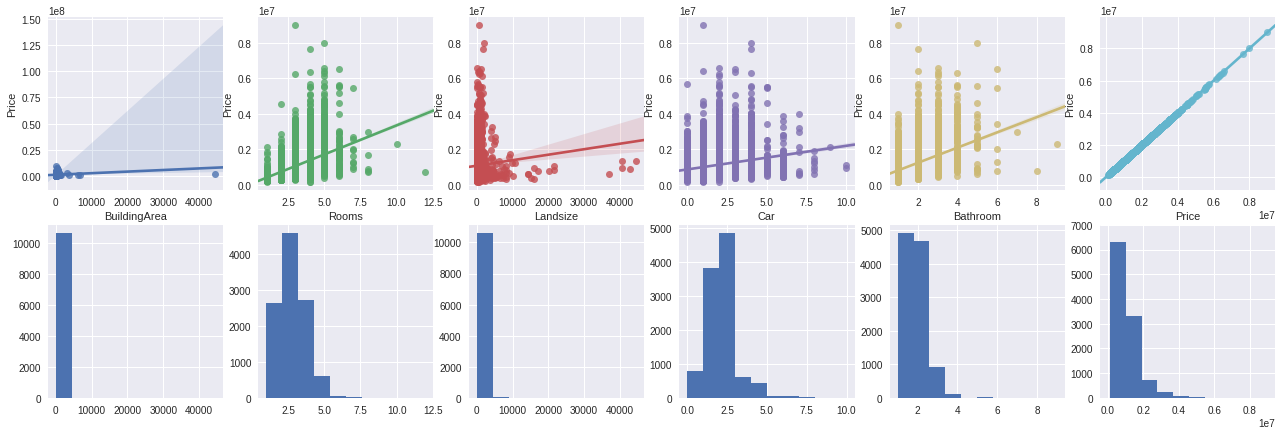

In [0]:
plot_str_arr = ['BuildingArea', 'Rooms', 'Landsize', 'Car', 'Bathroom', 'Price']
f, axarr = plt.subplots(2, len(plot_str_arr), figsize=(22,7))

i = 0
for plt_str in plot_str_arr:
    sns.regplot(x=plt_str, y="Price", data=housing_df_no_nan, ax=axarr[0,i])
    housing_df_no_nan[plt_str].hist(ax=axarr[1,i])
    i += 1
axarr[1,5].set_ylim([0,7000])
f.canvas.set_window_title('Scatter Plots and Histograms')

## 3.3. Remove outliers

- Outliers are datapoints located far from the other data points, these come with a risk of skewing the models and therefore we want to remove these. 

- In the plots above it seems like we have outliers in some of the columns. We will have a deeper look at some columns which seem to contain outliers. 

- Run the cell below to see a plot of BuildingArea vs Price where it is clear that we have some data points which are far away from the others. 

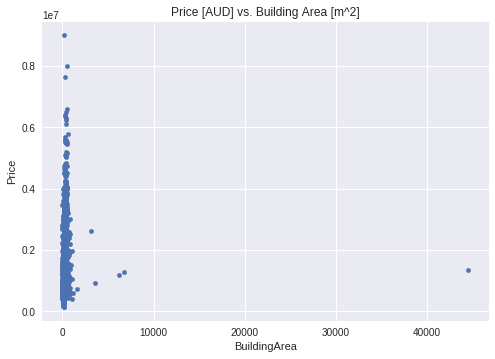

In [0]:
housing_df_no_nan.plot.scatter('BuildingArea', 'Price', title='Price [AUD] vs. Building Area [m^2]')

1)   Set clip-offs:



*   Building area = 500 m^2 (all data points larger than 500 will be set to 500)
*   Price= 4 000 000 AUD

2)  Plot again! 

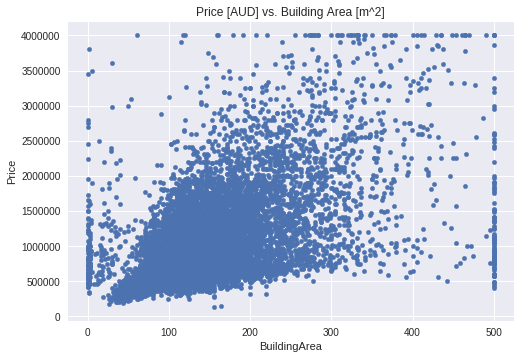

In [0]:
housing_clipped = housing_df_no_nan.copy()
housing_clipped['BuildingArea'] = housing_clipped['BuildingArea'].clip(0, 500)
housing_clipped['Price'] = housing_clipped['Price'].clip(0, 4e6)
housing_clipped.plot.scatter('BuildingArea', 'Price', title='Price [AUD] vs. Building Area [m^2]')

### ASSIGNMENT 1:

- Plot "Landsize" (unit=m^2) vs "Price" in the empty code cell below. 
- Does it look like there are some outliers? 
- If so, what could be a resonable cut-off? <br>
**Hint:** Have a look above at the statistical printouts for Landsize.
- Clip the data set to remove Landsize outliers, i.e replace the value of variable landsize_max with a resonable number. Plot again!

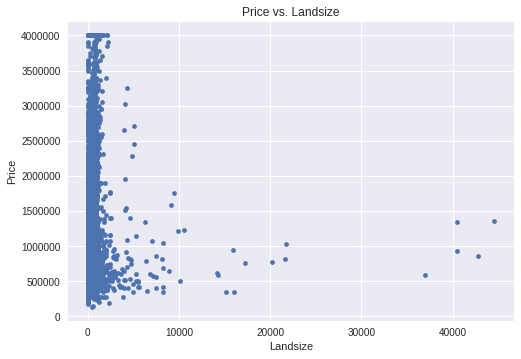

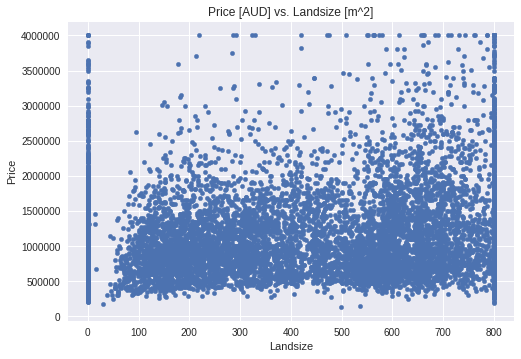

In [0]:
# ENTER CODE HERE


### SOLUTION ###
# Plot "Landsize" (unit=m^2) vs "Price" before clipping
housing_clipped.plot.scatter('Landsize', 'Price', title='Price vs. Landsize')

# Filter out or clip outliers for Landsize by setting resonable landsize value
landsize_max = 800
housing_clipped_l = housing_clipped.copy()
housing_clipped_l['Landsize'] = housing_clipped['Landsize'].clip(0, landsize_max)
housing_clipped_l.plot.scatter('Landsize', 'Price', title='Price [AUD] vs. Landsize [m^2]')


## 3.4 Plot histograms for indicative columns
- Lets have a look more closely at the variables we think could be interesting by plotting seperate and larger histograms.

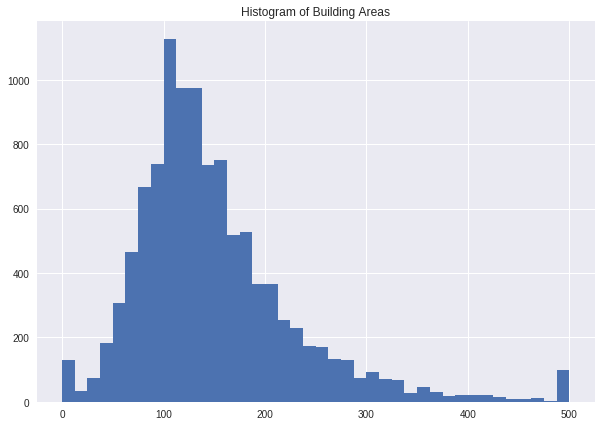

In [0]:
housing_clipped_l['BuildingArea'].hist(bins=40, figsize=(10,7))
plt.title('Histogram of Building Areas');

### ASSIGNMENT 2:

- Create a histogram of the variable Price in the empty code cell below.

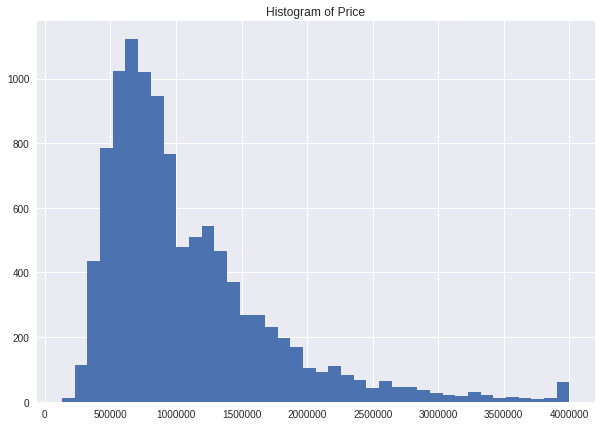

In [0]:
# CODE HERE


# SOLUTION
housing_clipped_l['Price'].hist(bins=40, figsize=(10,7))
plt.title('Histogram of Price');

## 3.5 Price for different regions
- We are also hypothesising that the property location will have an impact on the price. 
- Below a plot will be made to get a feel for how different locations might affect the price. 

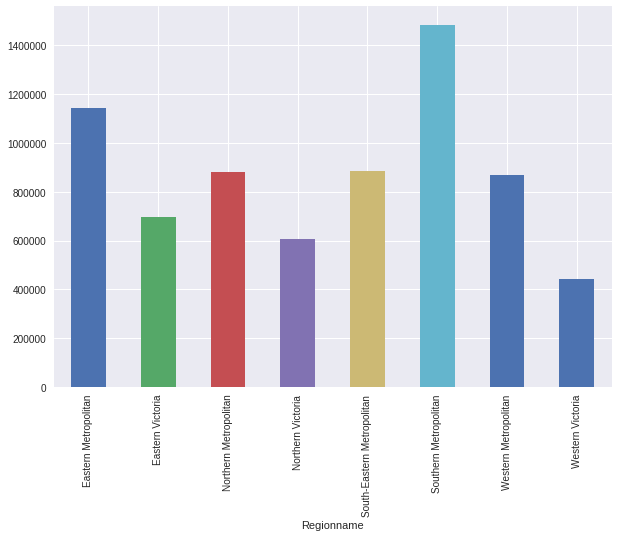

In [0]:
plt.figure(figsize=(10,7))
housing_clipped_l.groupby('Regionname')['Price'].mean().plot.bar();

### ASSIGNMENT 3: 
- Plot Price for different CouncilArea

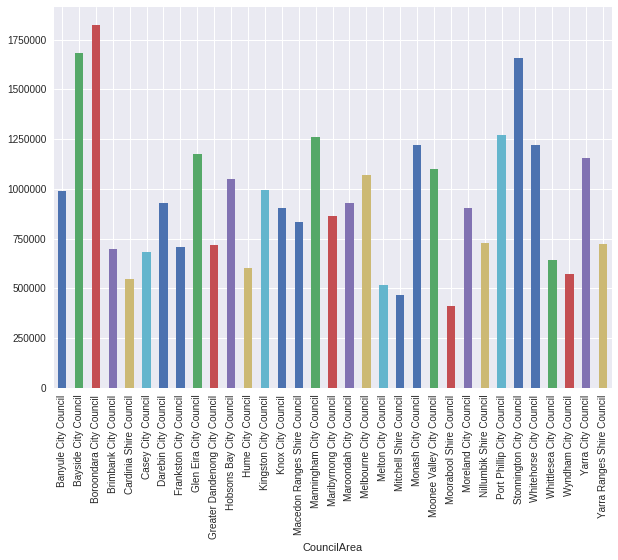

In [0]:
# CODE HERE

# SOLUTION
plt.figure(figsize=(10,7))
housing_clipped_l.groupby('CouncilArea')['Price'].mean().plot.bar();

# 4) BUILD/TRAIN MODEL: SIMPLE DIMENSIONAL LINEAR REGRESSION

- We are getting a feeling for what the data looks like, so now we might try a first model for predicting price. 
- The simple linear regression, one predictor variable (X) and one output variable (Y),  is very commonly used model. 

- We pick BuildingArea as a predictor to begin with since there seem to be a correlation between BuildingArea and Price according to our exploration. 

- The goal is to find all of the weights, $w_i$, in the following linear regression model. 


> $y = w_0 + w_1x_1$


**OBS! ** For more information about supervised learning and regression, look up section 3 in the course material, slide 24 for the simple linear regression.



## 4.1 Split dataset, pick algorithm, train model



[4324.26650735]


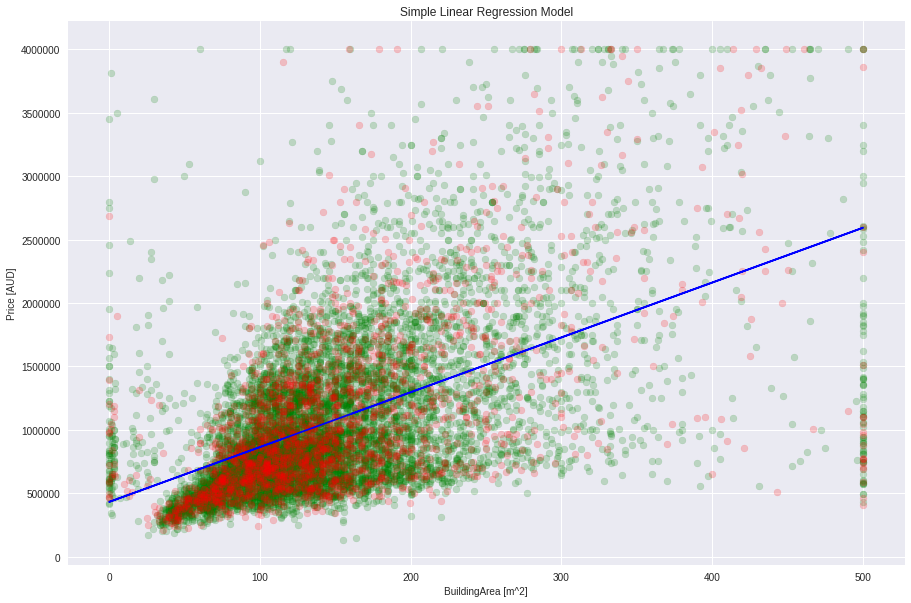

In [0]:
# Set up input (x) and output (y) variables
x = housing_clipped_l[['BuildingArea']]
y = housing_clipped_l['Price']

# Split into test and train data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, shuffle=False)

# Set up and train simple linear regression model
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)

# Perform predictions on testset
y_pred_simple = regr.predict(x_test)


### Plot results ###

# Prepare plotting figure and axes
plt.figure(figsize=(15,10));
plt.title('Simple Linear Regression Model');
plt.xlabel('BuildingArea [m^2]', fontsize=10)
plt.ylabel('Price [AUD]', fontsize=10)

# Plot training data in green color
plt.scatter(x_train.values, y_train.values, color='green', alpha=0.2)
# Plot test data in red color
plt.scatter(x_test.values, y_test.values, color='red', alpha=0.2)

# Plot the simple regression line based on test data in blue color
plt.plot(x_test, y_pred_simple, 'b')

print (regr.coef_)


## 4.2 Model evaluation
The error value will be compared to a baseline error which is the error if the prediction is just the mean of previous house values. 

In [0]:
# Evaluate Results

mean_absolute_error_simple = int((y_pred_simple - y_test).abs().mean())
mean_absolute_error_simple_formated = str('{:,}'.format(mean_absolute_error_simple).replace(',',' '))
mean_baseline_error = int((y_train.mean() - y_test).abs().mean())
mean_baseline_error_formated = str('{:,}'.format(mean_baseline_error).replace(',',' '))

print("\n******************* ALL RESULTS IN THIS EXECUTION ROUND *********************************************\n")
print('* EVALUATION: Mean Absolute Error with Simple Linear Regression = ' + mean_absolute_error_simple_formated)
print('* EVALUATION: Mean Baseline Error = ' + mean_baseline_error_formated)


if mean_absolute_error_simple_formated < mean_baseline_error_formated:
    print ('\nMean Absolute Error with "Simple Linear Regression" is smaller then "Mean Baseline Error". Good!')
print ("\n*****************************************************************************************************")


******************* ALL RESULTS IN THIS EXECUTION ROUND *********************************************

* EVALUATION: Mean Absolute Error with Simple Linear Regression = 396 227
* EVALUATION: Mean Baseline Error = 481 813

Mean Absolute Error with "Simple Linear Regression" is smaller then "Mean Baseline Error". Good!

*****************************************************************************************************


# 5) BUILD/TRAIN MODEL: MULTI-DIMENSIONAL LINEAR REGRESSION

- In order to increase the predictive power, i.e. to get a more accurate model, more information can be added to the model. 
- One way of doing that is by adding more input variables to the model. 
- Variables that could be tried are BuildingArea, Rooms, LandSize, Car. 


> $y = w_0 + w_1x_1 + w_2x_2 + \dots$


## 5.1 Split dataset, pick algorithm, train model

***** Regression coefficients: *****
Nr of features used = 4
BuildingArea = 3181.2973054263284
Rooms = 140141.59552398266
Car = -26137.119582245872
Landsize = 128.57658100299886


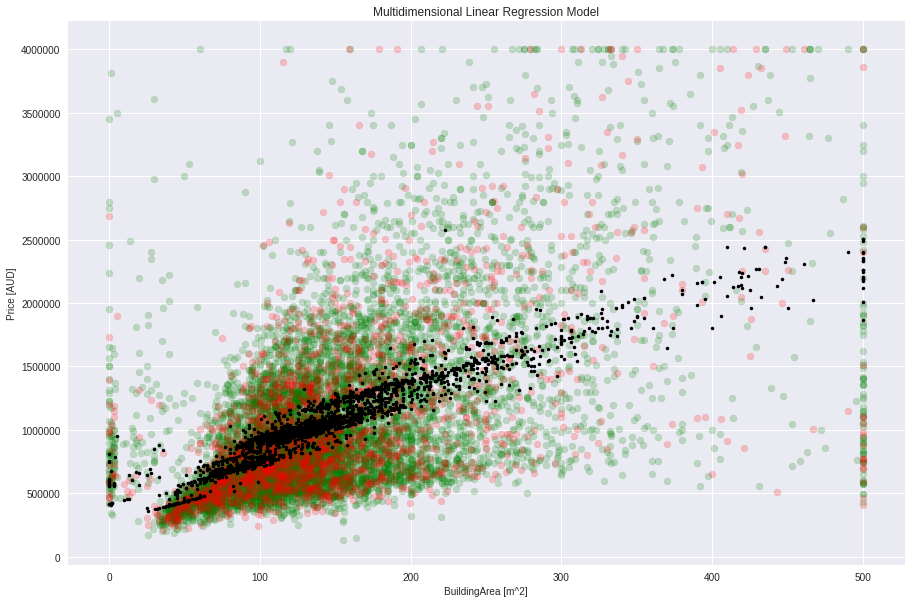

In [0]:
# Select fields/features for the model
features_list = ['BuildingArea', 'Rooms', 'Car', 'Landsize']
x = housing_clipped_l[features_list]
y = housing_clipped_l['Price']

# Split into test and train data
x_train_multidim, x_test_multidim, y_train_multidim, y_test_multidim = train_test_split(x, y, test_size=0.2, shuffle=False)

# Set up and train regression model
regr_multidim = linear_model.LinearRegression()
regr_multidim.fit(x_train_multidim, y_train_multidim)

# Perform predictions
y_pred_multidim = regr_multidim.predict(x_test_multidim)


######### Plot results ##########

# Prepare plotting figure and axes
plt.figure(figsize=(15,10));
plt.title('Multidimensional Linear Regression Model');
plt.xlabel('BuildingArea [m^2]', fontsize=10)
plt.ylabel('Price [AUD]', fontsize=10)

# Plot training data in green color
plt.scatter(x_train_multidim['BuildingArea'].values, y_train_multidim.values, color='green', alpha=0.2)
# Plot test data in red color
plt.scatter(x_test_multidim['BuildingArea'].values, y_test_multidim.values, color='red', alpha=0.2)

# Plot the multidim regression line based on test data in black color
plt.plot(x_test_multidim['BuildingArea'], y_pred_multidim, 'k.')
#plt.plot(x_test_multidim['BuildingArea'], y_pred_simple, 'b')


# Print regression coefficients, w
print('***** Regression coefficients: *****')
i=0
print('Nr of features used = ' + str(len(features_list)))
while i<len(features_list):
    print(features_list[i] + ' = ' + str(regr_multidim.coef_[i]))
    i+=1


## 5.2 Model evaluation

In [0]:
mean_absolute_error_multidim = int((y_pred_multidim - y_test_multidim).abs().mean())
mean_absolute_error_multidim_formated = str('{:,}'.format(mean_absolute_error_multidim).replace(',',' '))

print("\n***************************** EVALUATION RESULTS IN THIS EXECUTION ROUND **************************************** \n")
print('* EVALUATION: MEA with Multi-Dimensional Linear Regression = ' + mean_absolute_error_multidim_formated)
print('* EVALUATION: MEA with Simple Linear Regression = ' + mean_absolute_error_simple_formated)

if mean_absolute_error_multidim_formated < mean_absolute_error_simple_formated:
    print ('\n Mean Absolute Error with "Multi-Dimensional Linear Regression" is smaller then with "Simple Linear Regression". \n Good, our regression model is improving!')
print ("\n*****************************************************************************************************************")



***************************** EVALUATION RESULTS IN THIS EXECUTION ROUND **************************************** 

* EVALUATION: MEA with Multi-Dimensional Linear Regression = 386 735
* EVALUATION: MEA with Simple Linear Regression = 396 227

 Mean Absolute Error with "Multi-Dimensional Linear Regression" is smaller then with "Simple Linear Regression". 
 Good, our regression model is improving!

*****************************************************************************************************************


## ASSIGNMENT 4:
- Test your multidimensional model by adding some more fields/features, look up in the dataset columns list (20 available)
- **Q 4.1: **Write down the results and compare? 

**Hint**: Modify 2nd line of code in section 5.1. Add/remove features in features_input_list. Retrain the model and evaluate!

**Answers**: Provide them in the separate "Solutions and Answering sheet" document. 



# 6) BUILD/TRAIN MODEL: ANN (ARTIFICAL NEURAL NETWORK)


## 6.1 Split dataset, pick algorithm, train & evaluate model

The code in the following cell transforms data, builds a neural network and evaluates results of predictions from the neural net.

Good reading about different steps with Keras:
https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/

**OBS! ** For more information about ANN look up section 4 in the course material.

In [0]:
def run_neural_network(x, y, n_epochs=10, layer_list=[100,20], dropout_bool=False):
    
    # Split the dataset in training and test sets, skipping the validation set.
    x_train_nn, x_test_nn, y_train_nn, y_test_nn = train_test_split(x, y, train_size=0.8, test_size=0.2, shuffle=False)
    
    # Scale the data
    #scaler = MinMaxScaler()
    scaler = StandardScaler()

    x_train_nn = scaler.fit_transform(x_train_nn)
    x_test_nn = scaler.transform(x_test_nn)
    y_train_nn = scaler.fit_transform(y_train_nn.values.reshape(len(y_train_nn),1))
    y_test_nn= scaler.transform(y_test_nn.values.reshape(len(y_test_nn),1))
   
    # Define the NN structure (with Keras): 3 layers with (100,20,1) neurons, train.shape[1] input variables
    model = Sequential()
    model.add(Dense(layer_list[0], input_dim=x_train_nn.shape[1], activation='relu'))
    for layer_size in layer_list[1:]:
        if dropout_bool:
            model.add(Dropout(0.3))
        model.add(Dense(layer_size, activation='relu'))
    model.add(Dense(1, activation='linear'))
    
    # Plot model summary
    # print(model.summary())
    
    # Compile model 
    model.compile(loss='mse', optimizer='adam', metrics=['mean_squared_error', 'mean_absolute_error'])

    # Train the model
    history = model.fit(x_train_nn, y_train_nn, epochs=n_epochs, verbose=0, validation_data=(x_test_nn, y_test_nn))

    # Make a prediction
    y_pred_nn = model.predict(x_test_nn)[:,0]
    
    # Show the inputs and predicted outputs
    y_pred_nn = scaler.inverse_transform(y_pred_nn.reshape(len(y_pred_nn),1))
    y_test_nn = scaler.inverse_transform(y_test_nn)

    # Evaluate results
    mean_nn_error = int((pd.Series(y_pred_nn[:,0]) - y_test_nn[:,0]).abs().mean())
    mean_nn_error_formated = str('{:,}'.format(mean_nn_error).replace(',',' '))
    
    print ("\n ***************** EVALUATION RESULTS IN THIS EXECUTION ROUND *********************\n")
    print ("* MAE with Simple Linear Regression = "+ mean_absolute_error_simple_formated)
    print ("* MAE with MultiDimensional Linear Regression = "+ mean_absolute_error_multidim_formated)
    print ("* MAE with this NN execution = "+ mean_nn_error_formated)
    print ("\n***********************************************************************************")

    # Plot error over training time
    plt.figure(figsize=(10,7))
    plt.plot(history.history['mean_squared_error'], label='Train')
    plt.plot(history.history['val_mean_squared_error'], label='Validation')
    plt.title('Model Loss')
    plt.ylabel('Mean Squared Error')
    plt.xlabel('Epoch')
    #plt.legend(['Test', 'Train'], loc='upper left')
    plt.legend()
    plt.show()
    

## 6.2 Run ANN model:
Try running it a couple of times to see that the results may differ between runs. Reasons for this could be that weights are initialized randomly and training algorithm contains some random operation. 

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  # This is added back by InteractiveShellApp.init_path()



 ***************** EVALUATION RESULTS IN THIS EXECUTION ROUND *********************

* MAE with Simple Linear Regression = 396 227
* MAE with MultiDimensional Linear Regression = 386 735
* MAE with this NN execution = 349 503

***********************************************************************************


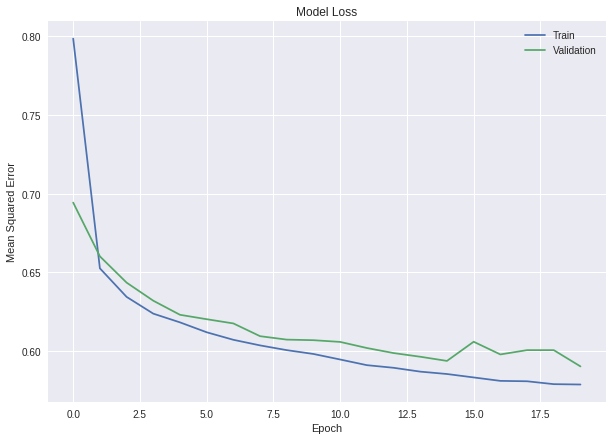

In [0]:
# Select fields/features for the model
features_list = ['BuildingArea', 'Rooms', 'Car', 'Landsize', 'Bathroom']
x = housing_clipped_l[features_list]
y = housing_clipped_l['Price']

# Train/execute neural network
run_neural_network(x, y, 20, [20, 10])


### ASSIGNMENT 5:
- Try running the model with different number of training epochs. 
- ** Q 5.1:** What happens with the loss for a higher amount of training epochs(time)?

**Hint:** Modify 7th code of line under section 6.2

**Answers:** Provide them in the separate "Solutions and Answering sheet" document. 


## 6.3 Improving ANN model - Adding more features

- Let's look at the data to see what we can do with it to create columns which are more easily readable for a ML algorithm and how we can get more insights from the data we have.
- Lets try and make the predictive model as good as possible by adding more features such as location and age of property. 

### 6.3.1 Add feature: House age
- Using the build year of a house directly as a feature is not good since most values will be around 2000. 
- A small difference in feature might be a big difference in actual house value; e.g. a house built 2017 is probably a lot more valuable than a house build 2007, but that is still a small percentual difference. The percentual difference between the age of 1 year and 11 years on the other hand gives a large difference. 
- We also log-transform the age to make it a bit more convenient for machine learning algorithms. 

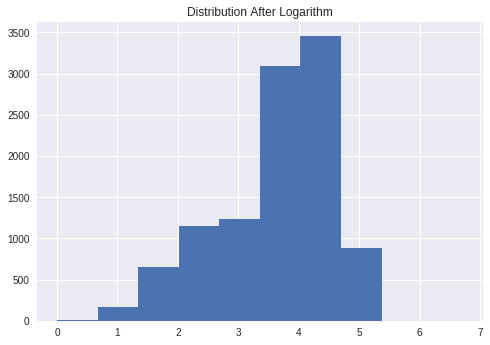

In [0]:
# Create house_ages feature
year_built = housing_clipped_l['YearBuilt'].clip(0, 2018)
house_ages = pd.Series(np.log((1 + (2018. - year_built))))
house_ages = house_ages.fillna(house_ages.mean())
house_ages.name = 'Age'
plt.figure()
house_ages.hist()
plt.title('Distribution After Logarithm')
house_ages_df = pd.DataFrame(house_ages)
features_w_age = pd.concat([housing_clipped_l, house_ages_df], axis=1)

*  Run the model with house_ages feature added.



/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  # This is added back by InteractiveShellApp.init_path()



 ***************** EVALUATION RESULTS IN THIS EXECUTION ROUND *********************

* MAE with Simple Linear Regression = 396 227
* MAE with MultiDimensional Linear Regression = 386 735
* MAE with this NN execution = 298 662

***********************************************************************************


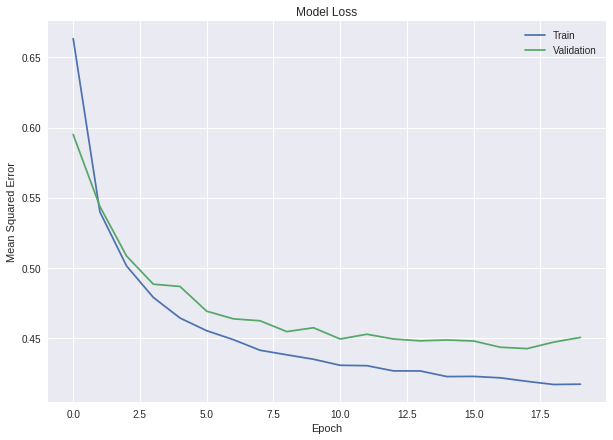

In [0]:
# Select fields/features for the model
new_feature_list = ['BuildingArea', 'Rooms',  'Car', 'Landsize'] + ['Age'] # + list(one_hot_region.columns)

# Train/execute neural network
run_neural_network(features_w_age[new_feature_list], features_w_age['Price'], n_epochs=20, layer_list=[20,10])

### 6.3.2 Add feature: Regionname 
*   Add Regionname as a feature by transforming it to one-hot, for more information about feture engineering look up section 5, slide 62.
*   Run the model with feature Regionname added.



/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python2.7/dist-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  # This is added back by InteractiveShellApp.init_path()



 ***************** EVALUATION RESULTS IN THIS EXECUTION ROUND *********************

* MAE with Simple Linear Regression = 396 227
* MAE with MultiDimensional Linear Regression = 386 735
* MAE with this NN execution = 282 638

***********************************************************************************


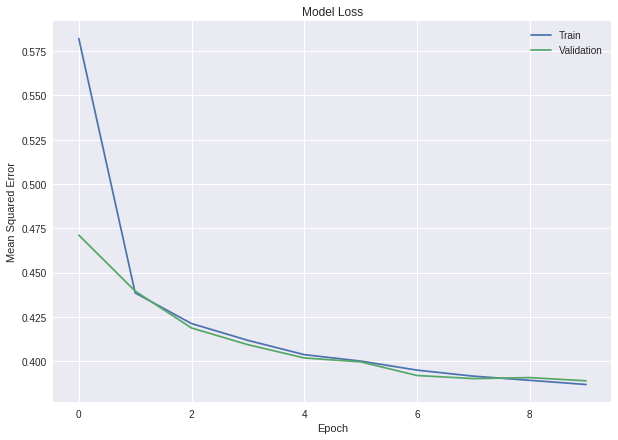

In [0]:
# Create region name feature with One-Hot encoding
one_hot_region = pd.get_dummies(housing_clipped_l.Regionname, prefix='Regionname')
region_feature = pd.concat([housing_clipped_l, one_hot_region], axis=1)

# Select fields/features for the model
new_feature_list = ['BuildingArea', 'Rooms', 'Car', 'Landsize'] + list(one_hot_region.columns)
x_new_features = region_feature[new_feature_list]
y_new_features = region_feature['Price']

# Train/execute neural network
run_neural_network(x_new_features, y_new_features, layer_list=[20,10])


### ASSIGNMENT 6:
* Try different sizes of the neural network. 
* Try out the below network configurations and observe the MAE (Mean Absolute Error) for test and train data.The lists below are denoted such that the 1st entry represents the number of neurons in the 1st layer, 2nd entry in the 2nd layer and so on.

>1.   Configuration 1: [2, 1]
>2.   Configuration 2: [20, 10]  (increasing the number or neurons)
>3.   Configuration 3: [1000, 100] (increasing the number or neurons even more)
>4.   Configuration 4: [5, 5, 5, 2] (more layers, the term deep learning originates from using many layers)
>5.   Configuration 5: Test your own configuration if you want to.


**Hint:** Modify 11th line of code under section 6.3.2


**Q 6.1:** What are the results when adding more layers? <br>
**Q 6.2:** What are the results when adding more neurons? <br>
**Q 6.3:** When is there a difference between the train and test data in Mean Squared Error?  <br> 

**Answers:** Provide them in the separate "Solutions and Answering sheet" document. 

### ASSIGNMENT 7: 
Trying adding more features  by adjusting the code above.

**Q 7.1: ** Which columns/features could be useful for providing more predictive power?  <br> 

**Answers:** Provide them in the separate "Solutions and Answering sheet" document. 

In [0]:
# ENTER CODE HERE


### SOLUTION ###
# Create council area feature with One-Hot encoding
one_hot_council = pd.get_dummies(housing_clipped_l.CouncilArea, prefix='CouncilArea')
council_feature = pd.concat([housing_clipped_l, one_hot_council, one_hot_region], axis=1)

# Select fields/features for the model
new_feature_list = ['BuildingArea', 'Rooms', 'Car', 'Landsize'] + list(one_hot_council.columns) + list(one_hot_region.columns) 
x_new_features = council_feature[new_feature_list]
y_new_features = council_feature['Price']

# Train/execute neural network
run_neural_network(x_new_features, y_new_features, layer_list=[20,10])


# ASSIGNMENT 8:

***DISCUSSION QUESTIONS:***

**Q 8.1: ** What was the lowest MAE (Mean Absolute Error) you got?  <br>
**Q 8.2: ** Based on the values from Q 8.1, which of the different models performed best?   <br>
**Q 8.3: ** Why does a well-tuned neural network perform better than a linear regression model?  <br>
**Q 8.4: ** What could be done to improve model performance?  <br>  

**Answers:** Provide them in the separate "Solutions and Answering sheet" document. 


